In [10]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import pickle

In [11]:
print(np.version.version)
print(sci.__version__)

1.26.4
1.13.1


In [15]:
# reading the data from the file `DMRG.pickle`
therm_data = []

with open("data/06-23_14-11-30___data.pickle",mode="rb") as res_file:
    while True:
        try:
            data = pickle.load(res_file)
            print(data["gate_set"])
            if data["gate_set"] == ("CNOT","H","T"):
                therm_data += [data,]
        except EOFError:
            print("File's over")
            break

('CNOT', 'H', 'X')
('CNOT', 'H', 'X')
('CNOT', 'H', 'X')
('CNOT', 'H', 'X')
('CNOT', 'H', 'X')
('CNOT', 'H', 'S')
('CNOT', 'H', 'S')
('CNOT', 'H', 'S')
('CNOT', 'H', 'S')
('CNOT', 'H', 'S')
('CNOT', 'H', 'T')
('CNOT', 'H', 'T')
('CNOT', 'H', 'T')
('CNOT', 'H', 'T')
('CNOT', 'H', 'T')
File's over


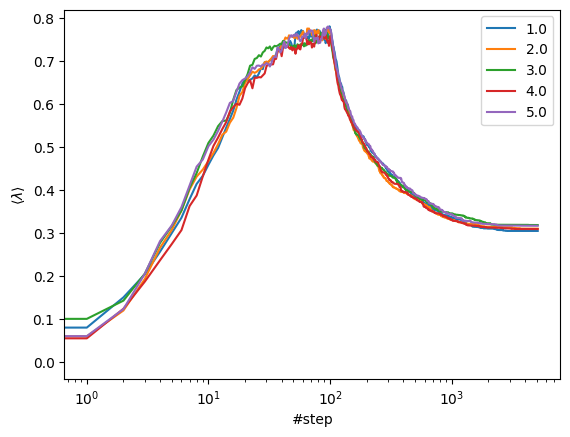

In [17]:
for dataset in therm_data:
    step_axis = np.arange(dataset["heating"]["nSteps"]+dataset["cooling"]["nSteps"]+2)
    plt.plot(step_axis,np.concatenate((dataset["singvals_heating"].mean(axis=1),dataset["singvals_cooling"].mean(axis=1))),label=dataset["cooling"]["beta"])
plt.xlabel("#step")
plt.xscale("log")
plt.ylabel(r"$\langle \lambda\rangle$")
plt.legend()